In [1]:
import pandas as pd

train = pd.read_csv('dm2_dataset_2425_imdb/train70_clf.csv')
test = pd.read_csv('dm2_dataset_2425_imdb/test30_clf.csv')

In [2]:
train.columns

Index(['startYear', 'runtimeMinutes', 'canHaveEpisodes', 'numRegions',
       'ratingCount', 'companiesNumber', 'averageRating', 'totalNominations',
       'totalMedia', 'totalReviews', 'Asia', 'Africa', 'Europe',
       'North America', 'South America', 'Oceania', 'Continent Unknown',
       'genre1', 'genre2', 'genre3', 'deltaCredits', 'titleType'],
      dtype='object')

In [3]:
X_train = train.drop(columns=['averageRating', 'canHaveEpisodes'])
y_train = train['averageRating']

X_test = test.drop(columns=['averageRating', 'canHaveEpisodes'])
y_test = test['averageRating']

# One-hot encode titleType
X_train = pd.get_dummies(X_train, columns=['titleType'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['titleType'], drop_first=True)

In [4]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Preprocess the target variable
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

max_val = y_train.max()
min_val = y_train.min()

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),  # Regression output
    layers.Lambda(lambda x: x * (max_val - min_val) + min_val)  # Scale output back to original range
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

2025-08-24 15:06:42.788082: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
model.evaluate(X_test, y_test)

Epoch 1/100
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.8561 - mae: 0.6989 - val_loss: 0.7835 - val_mae: 0.6566
Epoch 2/100
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7838 - mae: 0.6610 - val_loss: 0.7746 - val_mae: 0.6546
Epoch 3/100
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7655 - mae: 0.6522 - val_loss: 0.7621 - val_mae: 0.6579
Epoch 4/100
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7496 - mae: 0.6444 - val_loss: 0.7641 - val_mae: 0.6473
Epoch 5/100
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7497 - mae: 0.6442 - val_loss: 0.7474 - val_mae: 0.6422
Epoch 6/100
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7449 - mae: 0.6419 - val_loss: 0.7486 - val_mae: 0.6480
Epoch 7/100
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7410 - mae: 0.6391 - val_loss: 0.7414 - val_mae: 0.6408
Epoch 8/100
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7425 - mae: 0.6397 - val_loss: 0.7426 - val_mae: 0.6424
Epoch 9/100
2617/2617 ━━━━━━━━━━

[0.7381631731987, 0.6346091628074646]

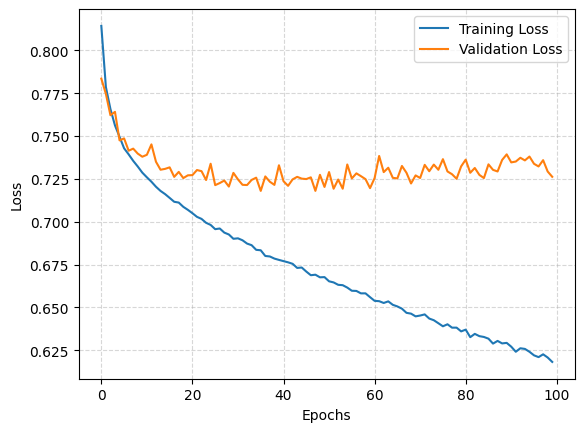

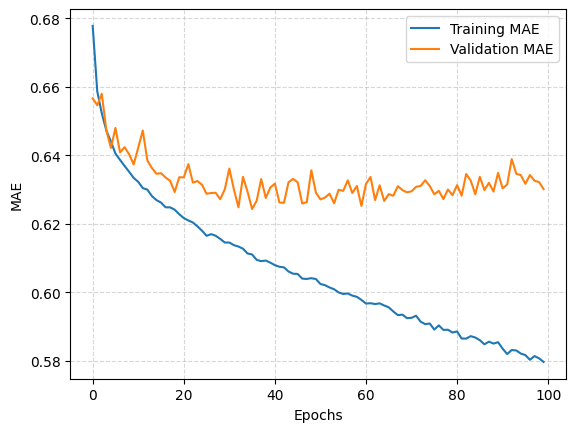

In [8]:
# Plot history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.show()

In [9]:
# R-squared, MSE and MAE computation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

1402/1402 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step
MSE: 0.7381629839013761
MAE: 0.6346089017063613
R-squared: 0.2700010887940264


In [10]:
# Reverse scale predictions
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

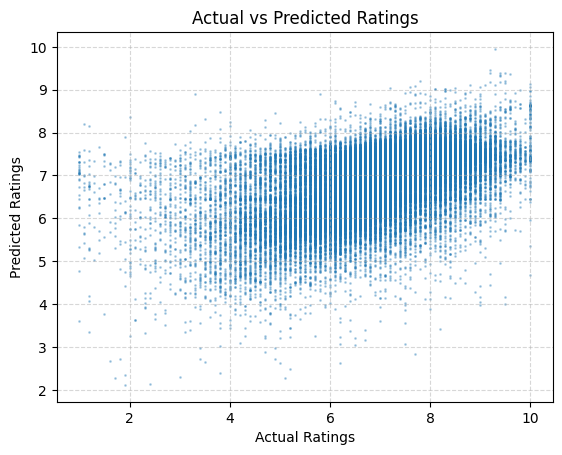

In [11]:
# Actual vs predicted plot
plt.scatter(y_test, y_pred, alpha=0.3, s=1, edgecolors=None)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

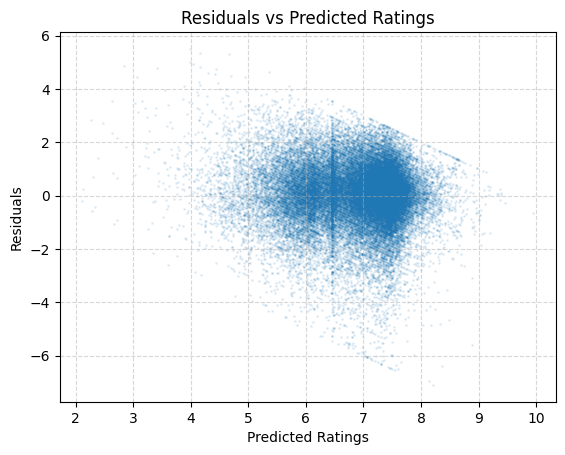

In [12]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.1, s=1, edgecolors=None)
# plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Ratings')
plt.grid(alpha=0.5, linestyle='--')
plt.show()